# Pymaceuticals Inc.
---

### Analysis

- Out of the 248 mice whose data was recorded (excluding duplicates), there is almost an even split of 51% male and 49% female.
- From the treatment options, Capomulin and Ramicane were the top 2 highest tested drugs, while Propriva was the lowest.
- Capomulin, Ramicane, Infubinol, and Ceftamin were analyzed for potential outliers. Only, Infubinol saw one potential outlier of a mouse whose final tumor volume was around 36 mm^3. 
- Then, Capomulin was analyzed on its effect on mouse l509 and saw a significant decrease in tumor volume over 40 days.
- It was then observed that there is a strong positive correlation between mice weight and tumor volume.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
len(mouse_data_complete['Mouse ID'].value_counts())

249

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]
clean_mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data_complete['Mouse ID'].value_counts())

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_means = clean_mouse_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_medians = clean_mouse_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_vars = clean_mouse_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_stds = clean_mouse_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sems = clean_mouse_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame(
    {
    'Mean Tumor Volume': tumor_means,
    'Median Tumor Volume': tumor_medians,
    'Tumor Volume Variance': tumor_vars,
    'Tumor Volume Std. Dev.': tumor_stds,
    'Tumor Volume Std. Err.': tumor_sems
    }
)
summary_df

C:\Users\Ixion\AppData\Local\Temp\ipykernel_20460\235918857.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_means = clean_mouse_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\Ixion\AppData\Local\Temp\ipykernel_20460\235918857.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_medians = clean_mouse_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\Ixion\AppData\Local\Temp\ipykernel_20460\235918857.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will defau

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_agg = clean_mouse_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

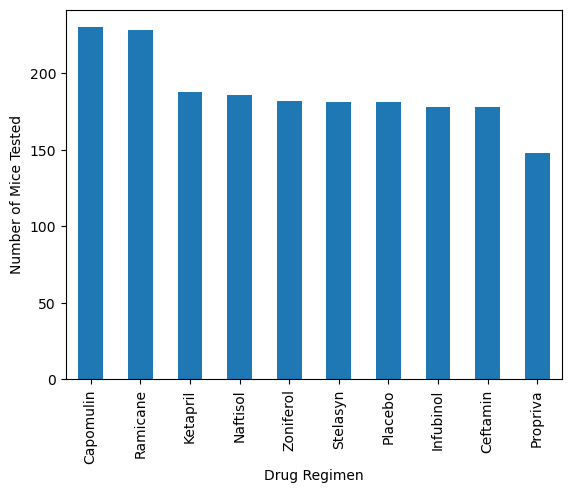

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_mouse_data_complete['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.tight_layout

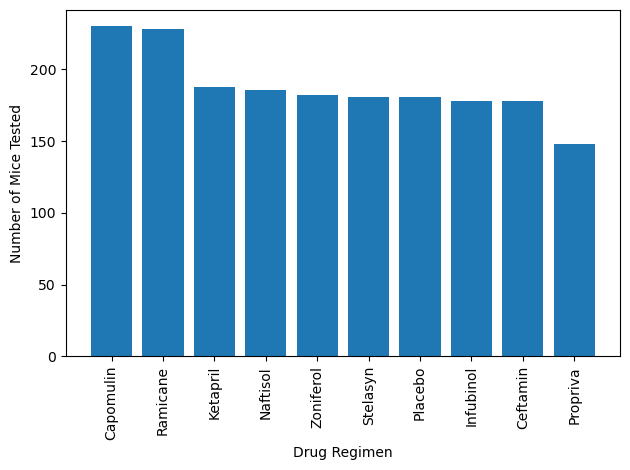

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_mouse_data_complete['Drug Regimen'].value_counts().index
y_axis = clean_mouse_data_complete['Drug Regimen'].value_counts().values
plt.bar(x_axis,y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.tight_layout()


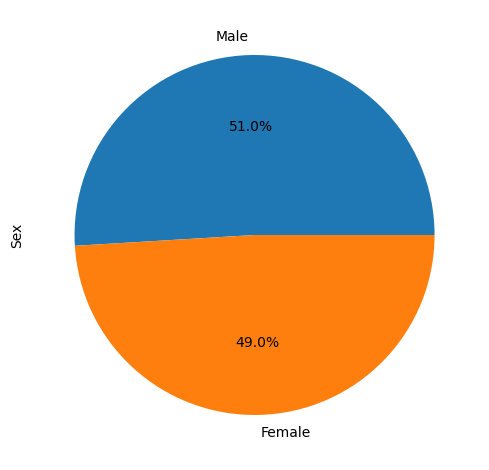

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_data_complete['Sex'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.tight_layout()

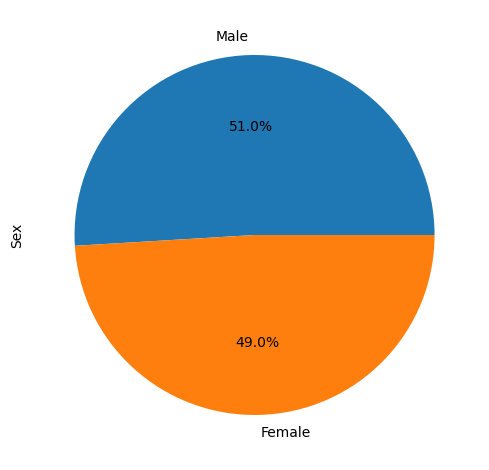

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_mouse_data_complete['Sex'].value_counts().index
values = clean_mouse_data_complete['Sex'].value_counts().values
plt.pie(values,labels=labels,autopct='%.1f%%')
plt.ylabel('Sex')
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_data_complete.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint,clean_mouse_data_complete,how='left',on=['Mouse ID','Timepoint'])
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment}'s potential outliers could be below {lower_bound} and above {upper_bound}.")

Capomulin's potential outliers could be below 20.70456164999999 and above 51.83201549.
Ramicane's potential outliers could be below 17.912664470000003 and above 54.30681135.
Infubinol's potential outliers could be below 36.83290494999999 and above 82.74144559000001.
Ceftamin's potential outliers could be below 25.355449580000002 and above 87.66645829999999.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

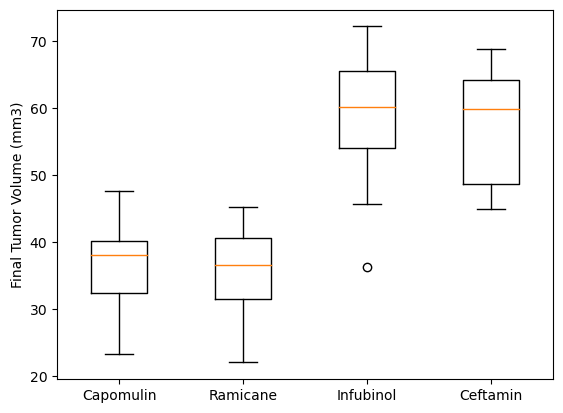

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data_list, labels=treatments_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

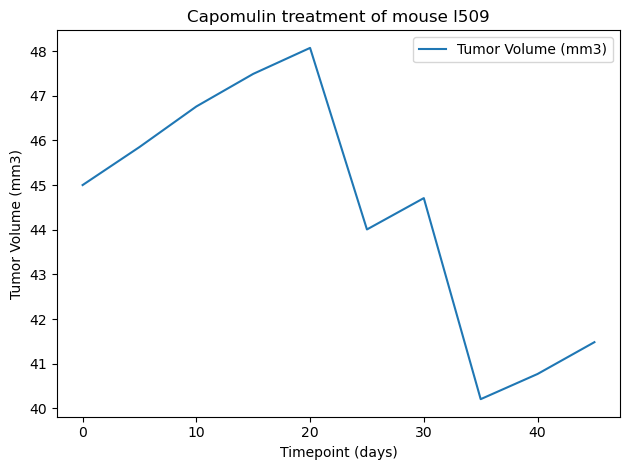

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_data_complete.loc[clean_mouse_data_complete['Drug Regimen'] == 'Capomulin']
mouse_l509_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
mouse_l509_df.plot(kind='line',x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.tight_layout()


C:\Users\Ixion\AppData\Local\Temp\ipykernel_20460\727825816.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_vol_capomulin_df = capomulin_df.groupby('Mouse ID').mean()


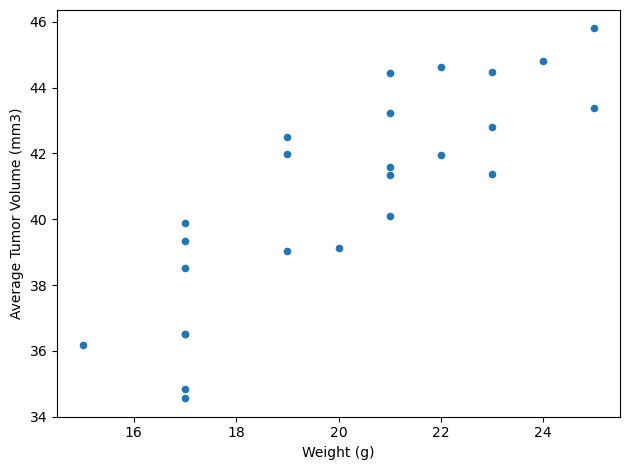

In [80]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse_data_complete.loc[clean_mouse_data_complete['Drug Regimen'] == 'Capomulin']
average_tumor_vol_capomulin_df = capomulin_df.groupby('Mouse ID').mean()
average_tumor_vol_capomulin_df.plot(kind='scatter',x='Weight (g)', y='Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


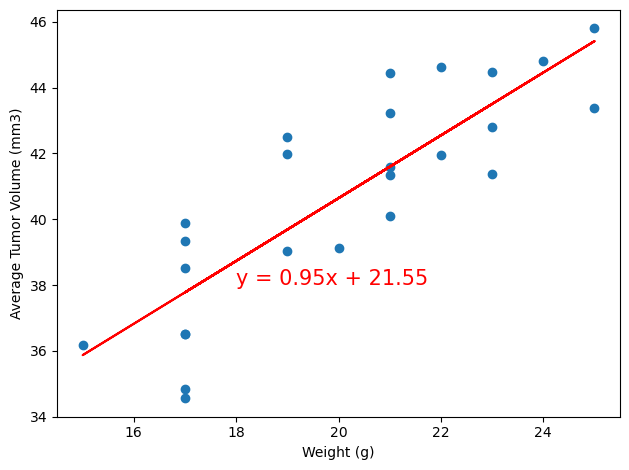

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_tumor_vol_capomulin_df['Weight (g)'],average_tumor_vol_capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

x_values = average_tumor_vol_capomulin_df['Weight (g)']
y_values = average_tumor_vol_capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
